In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\walte\Downloads\Traffic_Crashes_-_Crashes.csv")

In [5]:
df.head(3)
#Question 3: Is there a correlation between the number of traffic lanes and the severity of injuries in crashes?

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)


In [7]:
filtered_df = df.dropna(subset=['LANE_CNT'])

filtered_df.shape[0]

199017

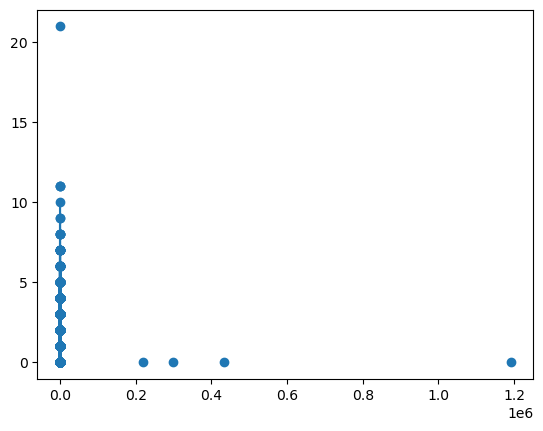

In [9]:
plt.plot(df['LANE_CNT'], df['INJURIES_NON_INCAPACITATING'], marker='o', label='Traffic Volume')

In [11]:
lanes_crashes = df.groupby('LANE_CNT')['CRASH_RECORD_ID'].count() 
print(lanes_crashes)

LANE_CNT
0.0           8032
1.0          32549
2.0          91159
3.0           8678
4.0          49588
5.0           1940
6.0           4502
7.0            184
8.0           1908
9.0             66
10.0           162
11.0            30
12.0            29
13.0             1
14.0             5
15.0             7
16.0             7
17.0             1
19.0             1
20.0            15
21.0             3
22.0            13
24.0             1
25.0             2
28.0             1
30.0             5
35.0             1
40.0             4
41.0             1
44.0             1
45.0             1
60.0             3
80.0             1
99.0           108
100.0            2
400.0            1
902.0            1
218474.0         1
299679.0         1
433634.0         1
1191625.0        1
Name: CRASH_RECORD_ID, dtype: int64
LANE_CNT
0.0           4.035836
1.0          16.354884
2.0          45.804630
3.0           4.360432
4.0          24.916464
5.0           0.974791
6.0           2.262118
7.0   

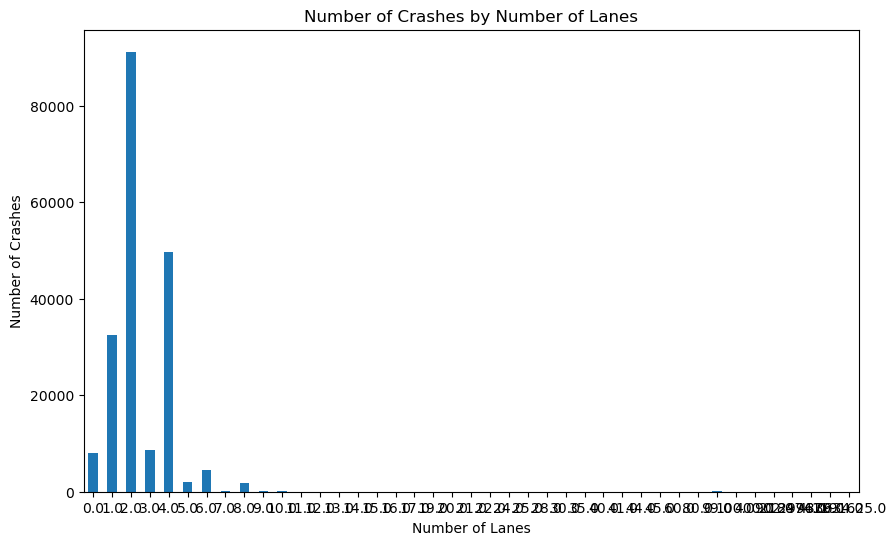

In [13]:
lanes_crashes.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Crashes by Number of Lanes')
plt.xlabel('Number of Lanes')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.show()

In [25]:
columns = [
    'LANE_CNT', 'CRASH_RECORD_ID', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
    'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
    'TRAFFICWAY_TYPE', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
    'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
    'CRASH_MONTH', 'LATITUDE', 'LONGITUDE'
]
df = df[columns]

# Clean the data
df = df[df['LANE_CNT'].notnull()]
df = df[df['POSTED_SPEED_LIMIT'].notnull()]
df['LANE_CNT'] = pd.to_numeric(df['LANE_CNT'], errors='coerce')
df['POSTED_SPEED_LIMIT'] = pd.to_numeric(df['POSTED_SPEED_LIMIT'], errors='coerce')


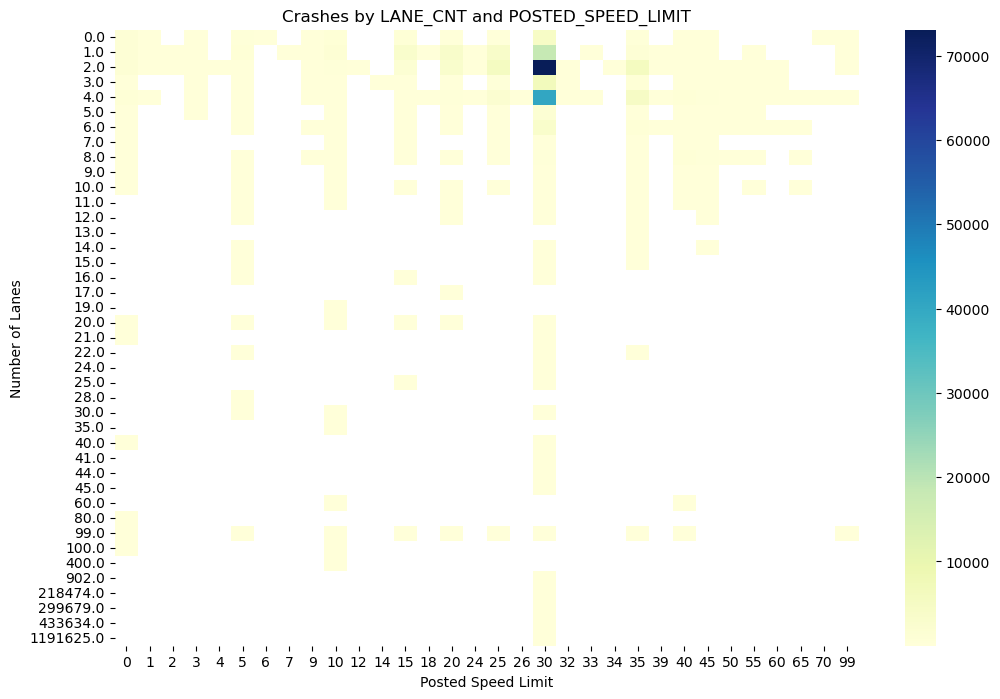

In [27]:
# Analyze crashes by LANE_CNT and POSTED_SPEED_LIMIT
lanes_speed_crashes = df.groupby(['LANE_CNT', 'POSTED_SPEED_LIMIT'])['CRASH_RECORD_ID'].count()
lanes_speed_crashes_unstacked = lanes_speed_crashes.unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(lanes_speed_crashes_unstacked, cmap='YlGnBu', annot=False, cbar=True)
plt.title('Crashes by LANE_CNT and POSTED_SPEED_LIMIT')
plt.xlabel('Posted Speed Limit')
plt.ylabel('Number of Lanes')
plt.show()

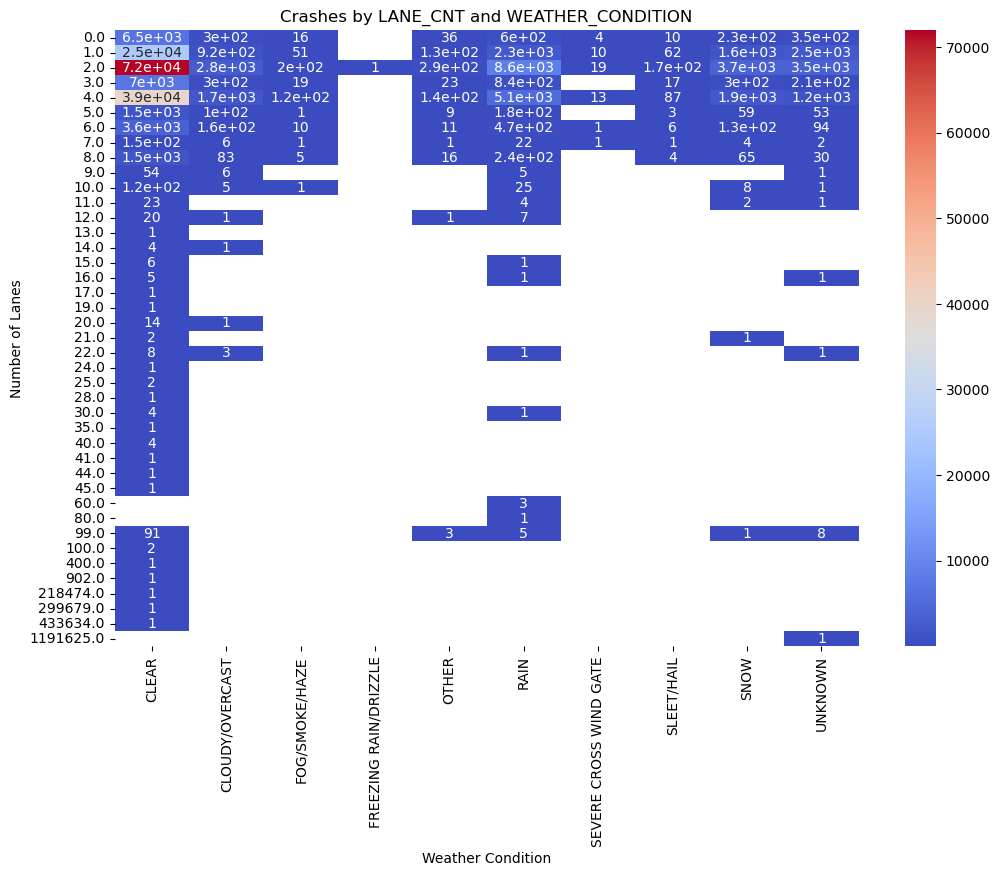

In [29]:
# Analyze crashes by LANE_CNT and WEATHER_CONDITION
lanes_weather = df.groupby(['LANE_CNT', 'WEATHER_CONDITION'])['CRASH_RECORD_ID'].count()
lanes_weather_unstacked = lanes_weather.unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(lanes_weather_unstacked, cmap='coolwarm', annot=True)
plt.title('Crashes by LANE_CNT and WEATHER_CONDITION')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Lanes')
plt.show()


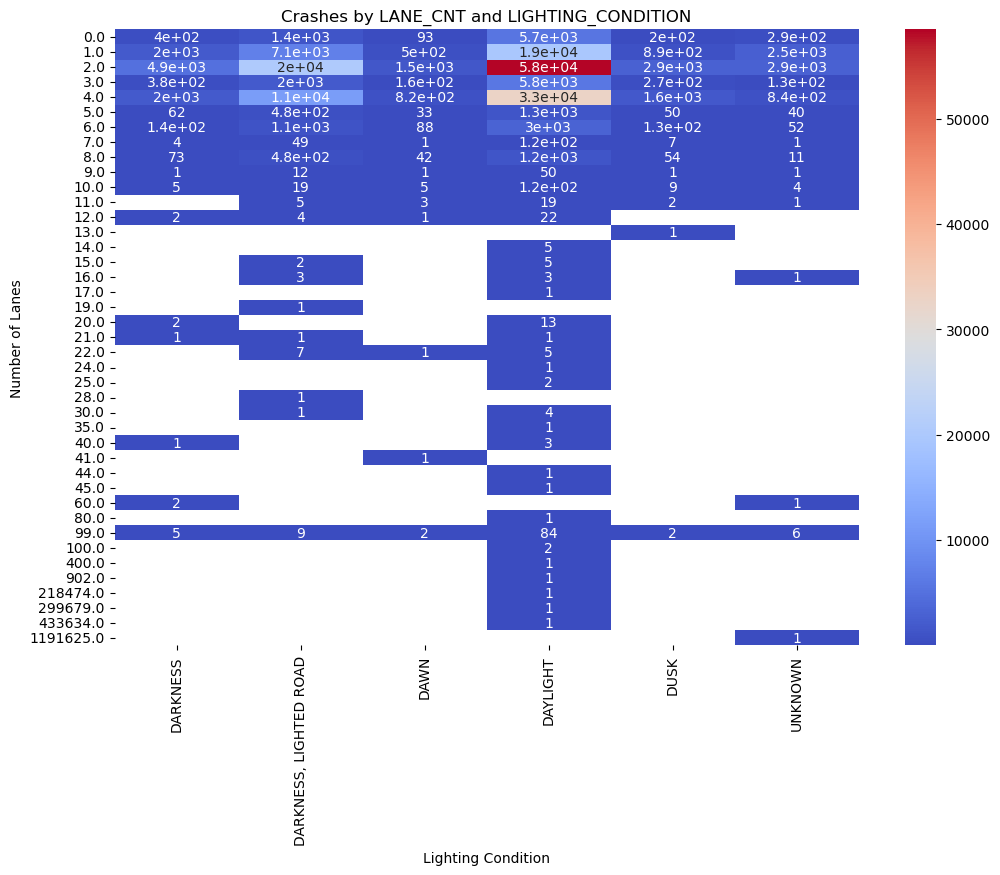

In [31]:
# Analyze crashes by LANE_CNT and LIGHTING_CONDITION
lanes_lighting = df.groupby(['LANE_CNT', 'LIGHTING_CONDITION'])['CRASH_RECORD_ID'].count()
lanes_lighting_unstacked = lanes_lighting.unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(lanes_lighting_unstacked, cmap='coolwarm', annot=True)
plt.title('Crashes by LANE_CNT and LIGHTING_CONDITION')
plt.xlabel('Lighting Condition')
plt.ylabel('Number of Lanes')
plt.show()


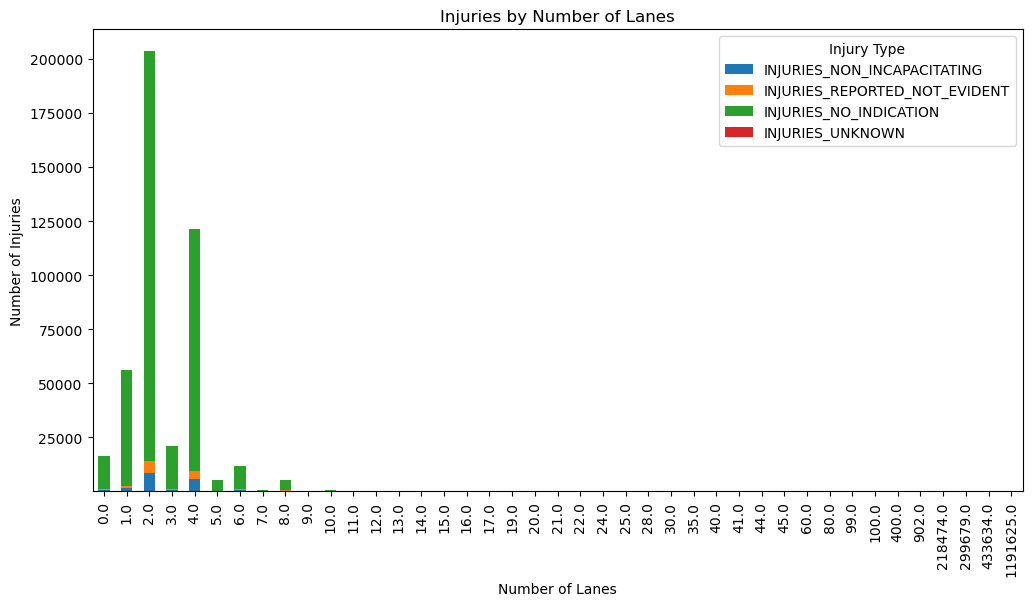

In [33]:
# Injury analysis by LANE_CNT
injuries_by_lanes = df.groupby('LANE_CNT')[
    ['INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
     'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN']
].sum()
injuries_by_lanes.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Injuries by Number of Lanes')
plt.xlabel('Number of Lanes')
plt.ylabel('Number of Injuries')
plt.legend(title='Injury Type')
plt.show()


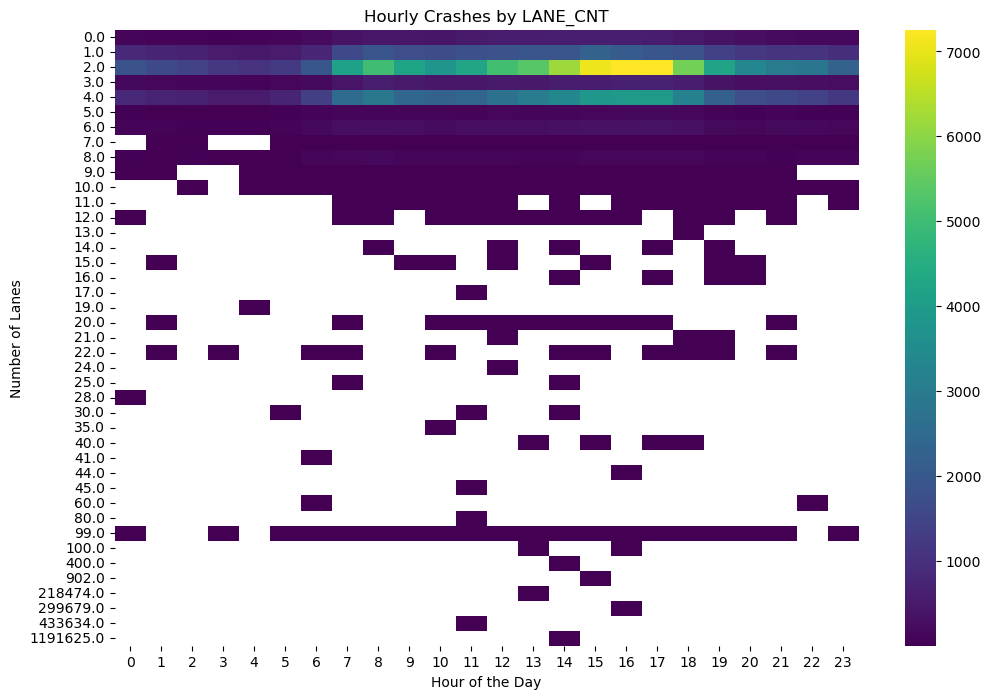

In [35]:
# Hourly crash trends by LANE_CNT
hourly_crashes = df.groupby(['LANE_CNT', 'CRASH_HOUR'])['CRASH_RECORD_ID'].count()
hourly_crashes_unstacked = hourly_crashes.unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_crashes_unstacked, cmap='viridis', annot=False, cbar=True)
plt.title('Hourly Crashes by LANE_CNT')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Lanes')
plt.show()


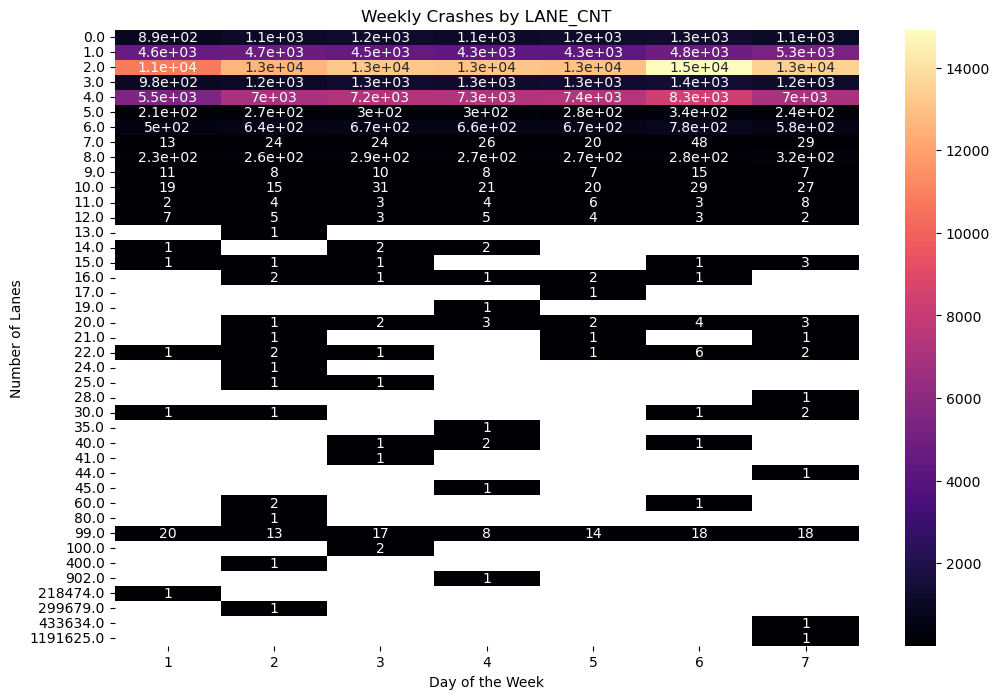

In [37]:
# Weekly crash trends by LANE_CNT
weekday_crashes = df.groupby(['LANE_CNT', 'CRASH_DAY_OF_WEEK'])['CRASH_RECORD_ID'].count()
weekday_crashes_unstacked = weekday_crashes.unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(weekday_crashes_unstacked, cmap='magma', annot=True)
plt.title('Weekly Crashes by LANE_CNT')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Lanes')
plt.show()

C:\Users\walte\AppData\Local\Temp\ipykernel_3376\3764197773.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=injuries_long, x='LANE_CNT', y='Count', hue='TRAFFIC_CONTROL_DEVICE', ci=None)


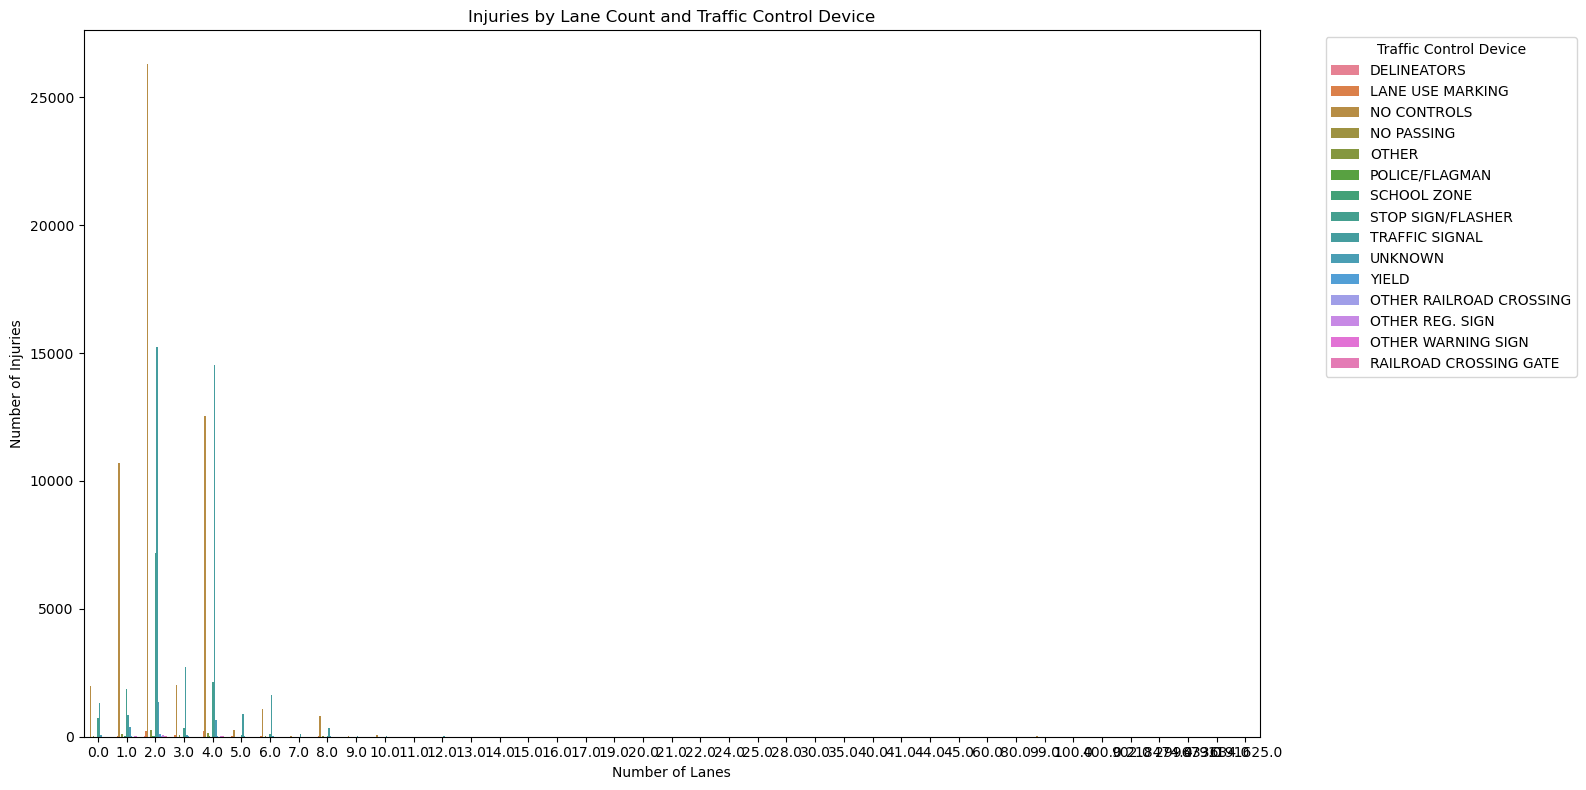

In [41]:
# Group by LANE_CNT and TRAFFIC_CONTROL_DEVICE, summing all injury types
injuries_by_device = df.groupby(['LANE_CNT', 'TRAFFIC_CONTROL_DEVICE'])[
    ['INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
     'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN']
].sum().reset_index()

# Convert to long format for easier visualization
injuries_long = injuries_by_device.melt(id_vars=['LANE_CNT', 'TRAFFIC_CONTROL_DEVICE'],
                                        var_name='Injury_Type', value_name='Count')

plt.figure(figsize=(16, 8))
sns.barplot(data=injuries_long, x='LANE_CNT', y='Count', hue='TRAFFIC_CONTROL_DEVICE', ci=None)
plt.title('Injuries by Lane Count and Traffic Control Device')
plt.xlabel('Number of Lanes')
plt.ylabel('Number of Injuries')
plt.legend(title='Traffic Control Device', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\walte\AppData\Local\Temp\ipykernel_3376\2174565888.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=injuries_weather_long, x='LANE_CNT', y='Count', hue='WEATHER_CONDITION', ci=None)


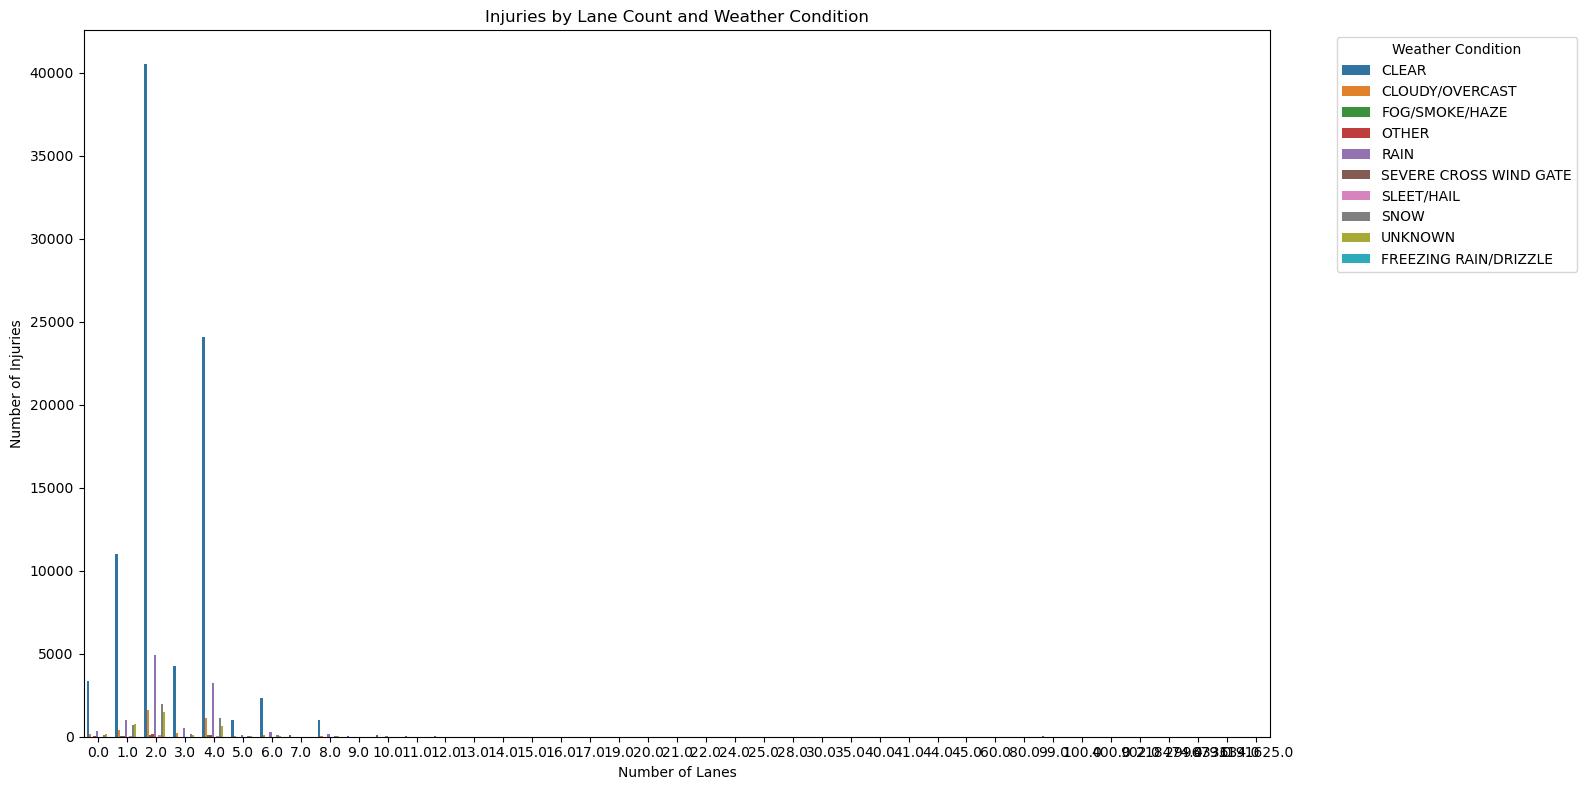

In [43]:
# Group by LANE_CNT and WEATHER_CONDITION
injuries_by_weather = df.groupby(['LANE_CNT', 'WEATHER_CONDITION'])[
    ['INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
     'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN']
].sum().reset_index()

# Convert to long format for visualization
injuries_weather_long = injuries_by_weather.melt(id_vars=['LANE_CNT', 'WEATHER_CONDITION'],
                                                 var_name='Injury_Type', value_name='Count')

plt.figure(figsize=(16, 8))
sns.barplot(data=injuries_weather_long, x='LANE_CNT', y='Count', hue='WEATHER_CONDITION', ci=None)
plt.title('Injuries by Lane Count and Weather Condition')
plt.xlabel('Number of Lanes')
plt.ylabel('Number of Injuries')
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\walte\AppData\Local\Temp\ipykernel_3376\1376132232.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  injuries_by_lighting_time = df.groupby(['LANE_CNT', 'LIGHTING_CONDITION', 'Time_Bucket'])[
C:\Users\walte\AppData\Local\Temp\ipykernel_3376\1376132232.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=injuries_lighting_time_long, x='Time_Bucket', y='Count',


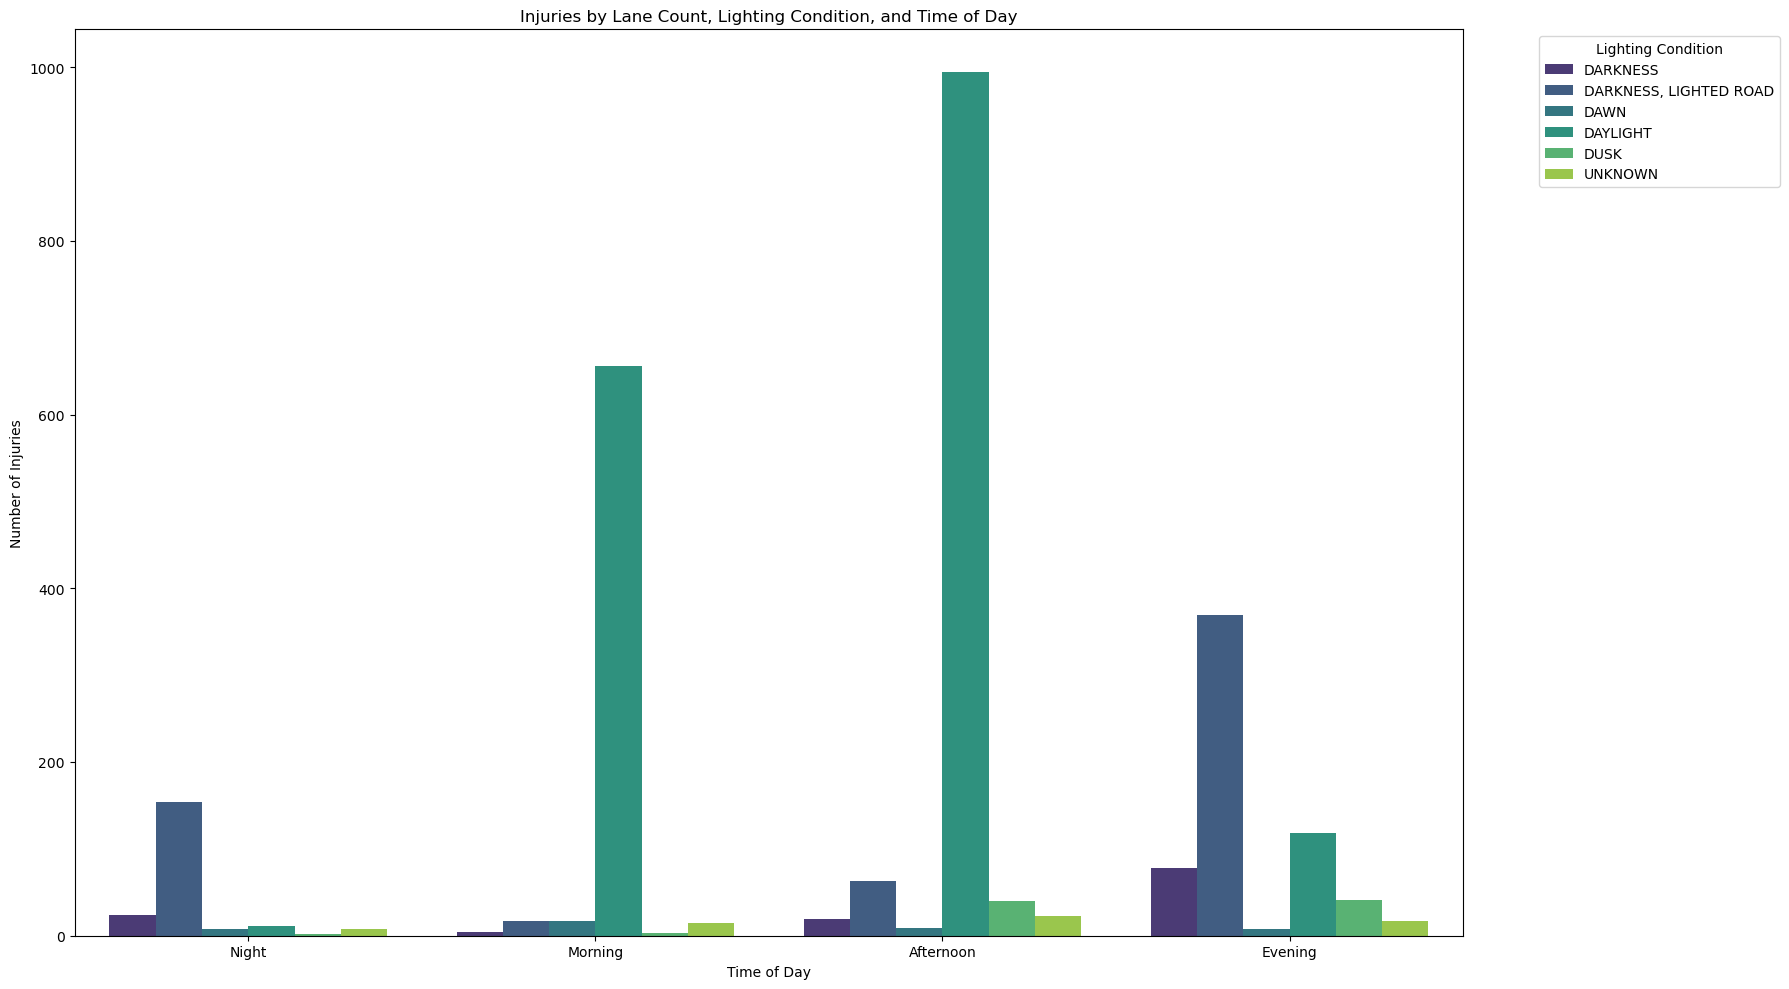

In [45]:
# Add time buckets (e.g., Morning, Afternoon, Evening, Night)
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['Time_Bucket'] = pd.cut(df['CRASH_HOUR'], bins=bins, labels=labels, right=False)

# Group by LANE_CNT, LIGHTING_CONDITION, and Time_Bucket
injuries_by_lighting_time = df.groupby(['LANE_CNT', 'LIGHTING_CONDITION', 'Time_Bucket'])[
    ['INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
     'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN']
].sum().reset_index()

# Convert to long format for visualization
injuries_lighting_time_long = injuries_by_lighting_time.melt(
    id_vars=['LANE_CNT', 'LIGHTING_CONDITION', 'Time_Bucket'],
    var_name='Injury_Type', value_name='Count'
)

plt.figure(figsize=(18, 10))
sns.barplot(data=injuries_lighting_time_long, x='Time_Bucket', y='Count',
            hue='LIGHTING_CONDITION', ci=None, palette='viridis')
plt.title('Injuries by Lane Count, Lighting Condition, and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Injuries')
plt.legend(title='Lighting Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


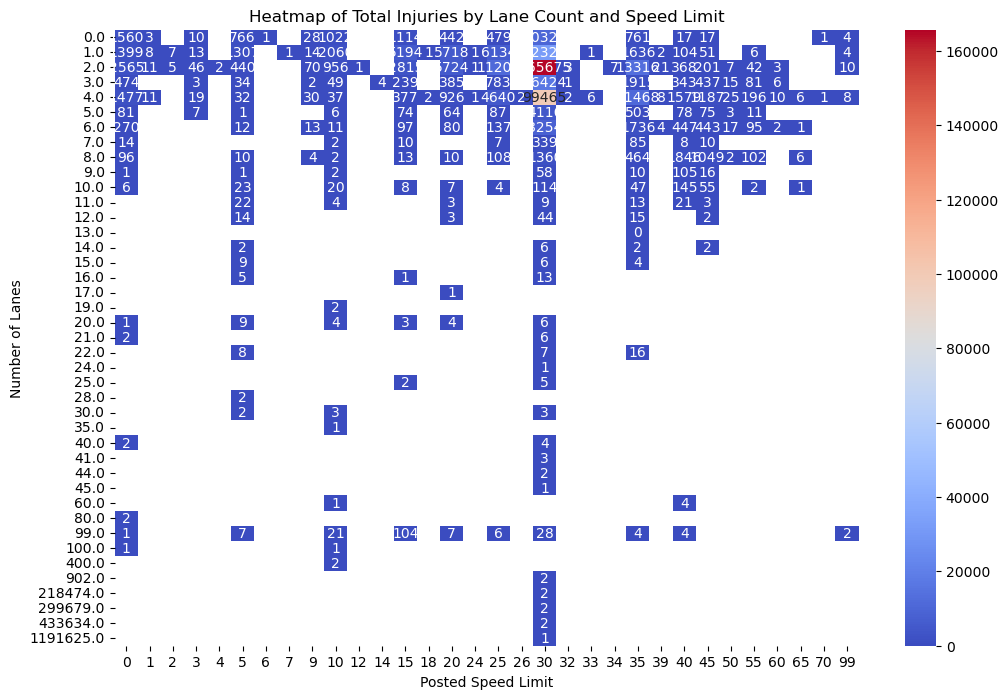

In [47]:
# Aggregate injuries by LANE_CNT, WEATHER_CONDITION, and POSTED_SPEED_LIMIT
injuries_heatmap = df.groupby(['LANE_CNT', 'WEATHER_CONDITION', 'POSTED_SPEED_LIMIT'])[
    ['INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
     'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN']
].sum().reset_index()

# Focus on total injuries
injuries_heatmap['Total_Injuries'] = injuries_heatmap[
    ['INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
     'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN']
].sum(axis=1)

# Pivot table for heatmap
heatmap_data = injuries_heatmap.pivot_table(index='LANE_CNT',
                                            columns='POSTED_SPEED_LIMIT',
                                            values='Total_Injuries', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f', cbar=True)
plt.title('Heatmap of Total Injuries by Lane Count and Speed Limit')
plt.xlabel('Posted Speed Limit')
plt.ylabel('Number of Lanes')
plt.show()
